<div style="text-align:center; font-size:70px; font-family:'Comic Sans MS'; font-weight:bold; margin:50px 0;">
<span style="color:#FFB4EE">g</span><span style="color:#FF6B00">e</span><span style="color:#FFA433">l</span><span style="color:#FFD525">u</span><span style="color:#B3BD3B">k</span><span style="color:#A0CAC9">z</span><span style="color:#FFB4EE">a</span><span style="color:#FF6B00">l</span><span style="color:#FFA433">i</span><span style="color:#FFD525">g</span><span style="color:#B3BD3B">h</span><span style="color:#A0CAC9">e</span><span style="color:#FFB4EE">i</span><span style="color:#FF6B00">d</span>
</div>



In [1]:
from IPython.display import Image

gif_path = r"C:\Users\tatum\InformatievisualsatieEindproject\regenboog GIF.gif"

Image(filename=gif_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tatum\\InformatievisualsatieEindproject\\regenboog GIF.gif'

<div style="text-align:center; font-size:30px; font-family:'Comic Sans MS'; font-weight:bold; margin:50px 0;">
<span style="color:#FFB4EE">i</span><span style="color:#FF6B00">n</span><span style="color:#FFA433">t</span><span style="color:#FFD525">r</span><span style="color:#B3BD3B">o</span><span style="color:#A0CAC9">d</span><span style="color:#FFB4EE">u</span><span style="color:#FF6B00">c</span><span style="color:#FFA433">t</span><span style="color:#FFD525">i</span><span style="color:#B3BD3B">e</span>
</div>



<div style="text-align:center; font-weight:bold; color: black; margin:50px 0; -webkit-text-stroke: 2px blue;">
Geluk speelt een rol in ieders leven (Grafiek 1). In een wereld waar vrijheid en geluk twee fundamentele pijlers van welzijn zijn, onderzoeken we diepgaand de boeiende interactie tussen beide. Door de lens van data-analyse richten we onze blik op de impact van de vrijheid die een land zijn volk biedt, evenals de invloed van het weer op het geluk van zijn bevolking.
</div>


C:\Users\tatum\AppData\Local\Temp\ipykernel_19876\2162191878.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



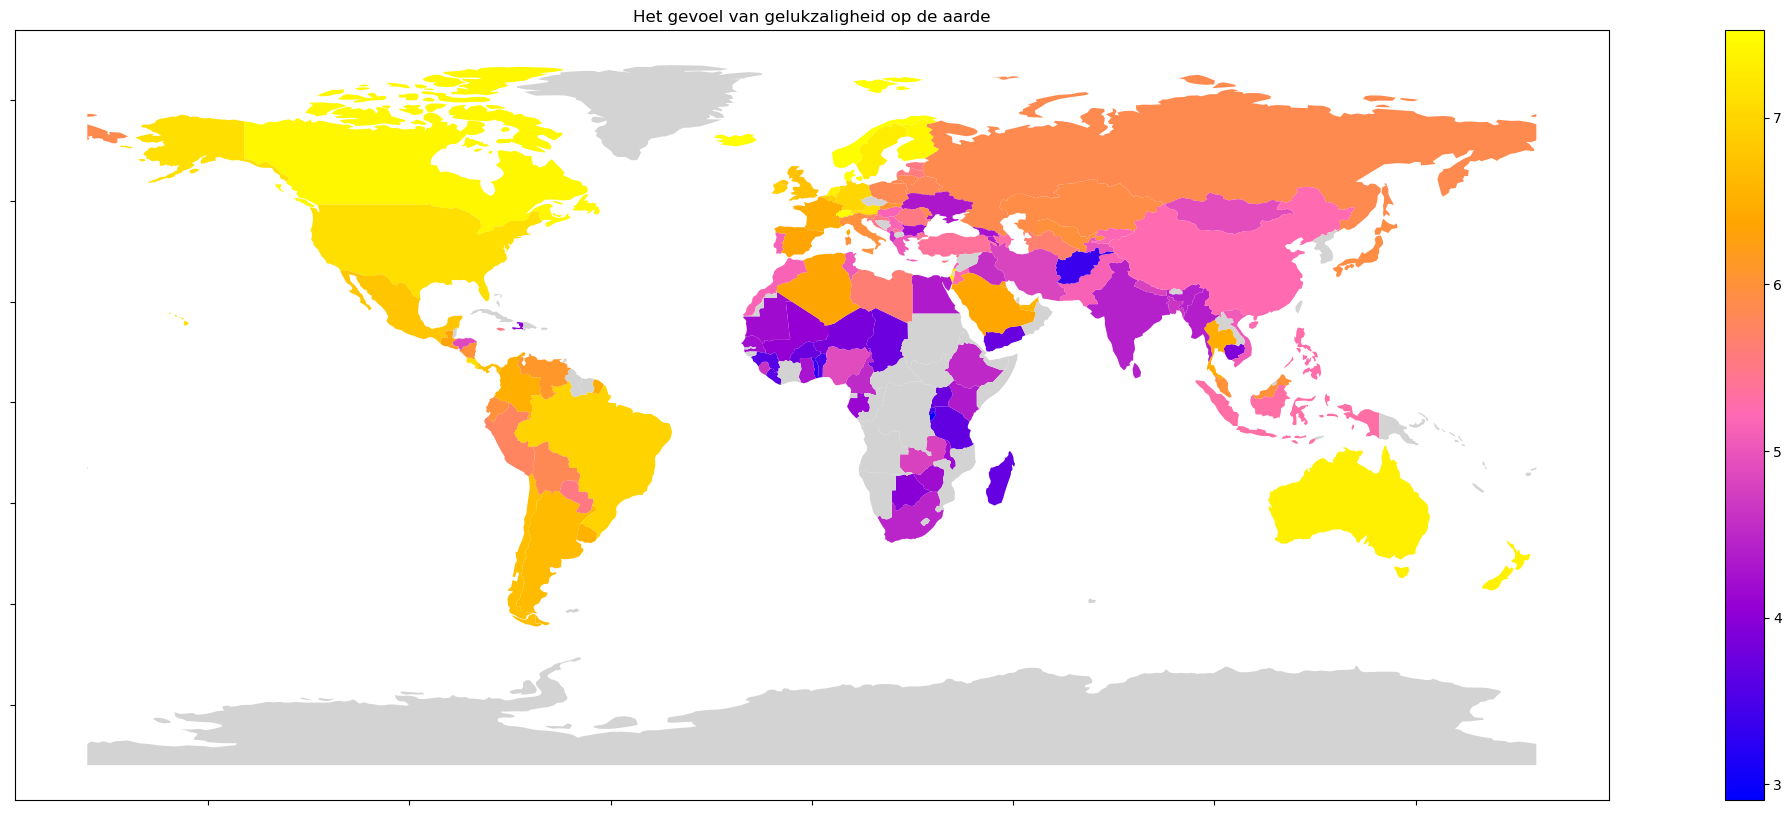

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read the dataset into a DataFrame
df = pd.read_csv(r"C:\Users\tatum\Downloads\merged_df_happy_2019.csv")

# Read the shapefile containing the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a dictionary that maps the country names in your dataset to the corresponding country names in the world GeoDataFrame
name_map = {
    'United States': 'United States of America',
}

# Replace the country names in your DataFrame using the name_map dictionary
df['Country or region'] = df['Country or region'].replace(name_map)

# Merge the two DataFrames on the country name
merged = world.merge(df, left_on='name', right_on='Country or region', how='left')

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list("mycmap", [[0, '#0000ff'], [0.25, '#9400d3'], [0.5, '#ff69b4'], [0.75, '#ffa500'], [1, '#ffff00']])

# Plot the world map with the happiness score as the color
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
merged.plot(column='happiness_score', ax=ax, legend=True, cmap=cmap, missing_kwds={'color': 'lightgrey'})

# Remove x and y axis tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Add a title to the plot
ax.set_title('Het gevoel van gelukzaligheid op de aarde')

plt.show()


Grafiek 1: Deze grafiek toont de verdeling van het geluksgevoel wereldwijd. De geluksscores zijn gebaseerd op zelfrapportage, waarbij hogere scores wijzen op een groter gevoel van geluk, terwijl lagere scores duiden op een lager geluksniveau. De grijze gebieden op de grafiek bevatten geen beschikbare gegevens en zijn niet meegenomen in de berekeningen.

<div style="text-align:center; font-size:30px; font-family:'Comic Sans MS'; font-weight:bold; margin:50px 0;">
<span style="color:#FFB4EE">S</span><span style="color:#FF6B00">t</span><span style="color:#FFA433">e</span><span style="color:#FFD525">l</span><span style="color:#B3BD3B">l</span><span style="color:#A0CAC9">i</span><span style="color:#FFB4EE">n</span><span style="color:#FF6B00">g</span><span style="color:#FFA433">:</span>
</div>



<div style="text-align:center; font-weight:bold; color: black; margin:50px 0; -webkit-text-stroke: 2px blue;">
Vrijheid die een overheid kan bieden aan haar volk, heeft een positieve invloed op de gelukzaligheid van haar burgers.
</div>

In [33]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from plotly.subplots import make_subplots
from scipy.stats import linregress

# Lees het CSV-bestand met gegevens over landen
df = pd.read_csv(r"C:\Users\tatum\Desktop\Informatievisualisatie\datasetgroot.csv")

# Bereken de gemiddelde geluksscore, het gemiddelde overheidsvertrouwen en de gemiddelde vrijheid
mean_happiness = df['happiness_score'].mean()
mean_trust = df['government_trust'].mean()
mean_freedom = df['freedom'].mean()

# Centreer de gegevens rond het nulpunt
df['happiness_score_centered'] = df['happiness_score'] - mean_happiness
df['government_trust_centered'] = df['government_trust'] - mean_trust
df['freedom_centered'] = df['freedom'] - mean_freedom

# Create a custom colormap that goes from blue to purple to pink to orange to yellow
cmap = LinearSegmentedColormap.from_list('BluePurplePinkOrangeYellow', ['#0000ff', '#9400d3', '#ff69b4', '#ffa500', '#ffff00'])
norm = plt.Normalize(vmin=df['happiness_score'].min() - 1, vmax=df['happiness_score'].max() + 1)
df['happiness_color'] = df['happiness_score'].apply(lambda x: cmap(norm(x)))

# Convert the RGBA values to a valid CSS color string
df['happiness_color'] = df['happiness_color'].apply(lambda x: mcolors.to_hex(x))

# Maak een figuur met een aangepaste grootte en drie subplots
fig = make_subplots(rows=1, cols=3)

# Plot the gegevens als tekst in plaats van punten met een grotere tekstgrootte en aangepaste lettertype voor de eerste subplot
for i, row in df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['government_trust_centered']],
        y=[row['freedom_centered']],
        mode='text',
        text=[row['Country'][:3]],
        hovertext=[row['Country']],
        textposition='bottom center',
        textfont=dict(
            size=14,
            color=row['happiness_color'],
            family='Arial Black'
        ),
        hovertemplate='<b>%{hovertext}</b>',
        hoverlabel=dict(
            bgcolor='white',
            font=dict(
                size=16,
                color=row['happiness_color']
            )
        )
    ), row=1, col=1)

# Plot the correlation between freedom and government trust for the second subplot
fig.add_trace(go.Scatter(
    x=df['government_trust'],
    y=df['freedom'],
    mode='markers',
    marker=dict(
        color=df['happiness_color']
    ),
    showlegend=False,
    hovertemplate='<b>%{hovertext}</b>',
    hoverlabel=dict(
        bgcolor='white',
        font=dict(
            size=16,
            color=row['happiness_color']
        )
    )
), row=1, col=2)

# Calculate the linear regression between freedom and government trust and add a correlation line to the second subplot
slope, intercept, r_value, p_value, std_err = linregress(df['government_trust'], df['freedom'])
fig.add_trace(go.Scatter(
    x=df['government_trust'],
    y=slope * df['government_trust'] + intercept,
    mode='lines',
    line=dict(
        color='black'
    ),
    showlegend=False,
), row=1, col=2)

# Plot the correlation between government trust and happiness for the third subplot
fig.add_trace(go.Scatter(
    x=df['government_trust'],
    y=df['happiness_score'],
    mode='markers',
    marker=dict(
        color=df['happiness_color']
    ),
    showlegend=False,
    hovertemplate='<b>%{hovertext}</b>',
    hoverlabel=dict(
        bgcolor='white',
        font=dict(
            size=16,
            color=row['happiness_color']
        )
    )
), row=1, col=3)

# Calculate the linear regression between government trust and happiness and add a correlation line to the third subplot
slope, intercept, r_value, p_value, std_err = linregress(df['government_trust'], df['happiness_score'])
fig.add_trace(go.Scatter(
    x=df['government_trust'],
    y=slope * df['government_trust'] + intercept,
    mode='lines',
    line=dict(
        color='black'
    ),
    showlegend=False,
), row=1, col=3)

# Add a colorbar to the figure
fig.add_trace(go.Scatter(
    x=[None],
    y=[None],
    mode='markers',
    marker=dict(
        size=1,
        color=df['happiness_score'],
        colorscale=[[0, '#0000ff'], [0.25, '#9400d3'], [0.5, '#ff69b4'], [0.75, '#ffa500'], [1, '#ffff00']],
        cmin=df['happiness_score'].min() - 1,
        cmax=df['happiness_score'].max() + 1,
        showscale=True,
        colorbar=dict(
            title='Geluksscore',
            tickvals=[df['happiness_score'].min(), df['happiness_score'].max()],
            ticktext=['Min', 'Max']
        )
    ),
    showlegend=False
))

# Pas de opmaak van de plot aan
fig.update_layout(
    title='Overheidsvertrouwen en vrijheid',
    showlegend=False,
    xaxis=dict(
        title='Overheidsvertrouwen',
        zeroline=True,
        zerolinecolor='black',
        showline=False,
        showgrid=False,
        linecolor='black',
        mirror=True,
        showticklabels=False
    ),
    yaxis=dict(
        title='Vrijheid',
        zeroline=True,
        zerolinecolor='black',
        showline=False,
        showgrid=False,
        linecolor='black',
        mirror=True,
        showticklabels=False
    ),
    xaxis2=dict(
        title='Overheidsvertrouwen'
    ),
    yaxis2=dict(
        title='Vrijheid'
    ),
    xaxis3=dict(
        title='Overheidsvertrouwen'
    ),
    yaxis3=dict(
        title='Geluksscore'
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=1200,
    height=500
)

# Toon de interactieve plot
fig.show()


Grafiek 2: De gele punten in het rechterbovenkwadrant, die hogere geluksscores vertegenwoordigen, suggereren dat landen met hogere niveaus van overheidsvertrouwen en vrijheid over het algemeen gelukkiger zijn. Deze landen worden gekenmerkt als "blij". Daarentegen duiden de donkere punten in het linkeronderkwadrant, met lagere geluksscores, op lagere niveaus van overheidsvertrouwen en vrijheid, en worden ze beschouwd als "niet blij". Het ontbreken van vrijheid kan leiden tot een gevoel van ontevredenheid en kan het vertrouwen in de overheid ondermijnen, wat op zijn beurt het algemene geluksniveau kan beïnvloeden.

In [37]:
import pandas as pd
import plotly.graph_objects as go

# Lees het CSV-bestand met gegevens over landen
df = pd.read_csv(r"C:\Users\tatum\Downloads\merged_df_happy_2019.csv")

# Creëer de grafiek met behulp van Plotly
fig = go.Figure(data=go.Scatter(
    x=df['GDP per capita'],
    y=df['freedom'],
    mode='markers',
    text=df['Country'],
    marker=dict(
        size=df['happiness_score']*10,
        color=df['happiness_score'],
        colorscale=[[0, '#0000ff'], [0.25, '#9400d3'], [0.5, '#ff69b4'], [0.75, '#ffa500'], [1, '#ffff00']],
        showscale=True,
        colorbar=dict(
            title='Geluksscore'
        )
    )
))

# Pas de opmaak van de grafiek aan
fig.update_layout(
    title='GDP per capita en geluksscore',
    xaxis=dict(
        title='GDP per capita'
    ),
    yaxis=dict(
        title='Vrijheid'
    )
)

# Toon de interactieve grafiek
fig.show()


In [53]:
import pandas as pd
import plotly.graph_objects as go

# Lees het CSV-bestand met gegevens over landen
df = pd.read_csv(r"C:\Users\tatum\Downloads\merged_df_happy_2019.csv")

# Kies een drempelwaarde voor GDP per capita
threshold = 1

# Maak een nieuwe kolom met de groepsnaam
df['group'] = df['GDP per capita'].apply(lambda x: 'Laag' if x < threshold else 'Hoog')

# Maak een lege figuur
fig = go.Figure()

# Voeg voor elke groep een boxplot toe voor geluksscore
for group in ['Laag', 'Hoog']:
    # Filter de dataframe op groep
    df_group = df[df['group'] == group]
    
    # Voeg een boxplot toe voor geluksscore
    fig.add_trace(go.Box(
        y=df_group['happiness_score'],
        name=group,
        marker_color='#ff69b4' if group == 'Laag' else '#9400d3',
        boxmean=True,
        boxpoints='all',
        jitter=1,
        pointpos=-1.8
    ))

# Pas de opmaak van de grafiek aan
fig.update_layout(
    title='Geluksscore per GDP per capita groep',
    yaxis=dict(
        title='Geluksscore'
    ),
    xaxis=dict(
        title='GDP per capita groep'
    ),
    boxmode='group',
    plot_bgcolor='white'
)

# Toon de interactieve grafiek
fig.show()
